# Multi-Layer Perceptron

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
def show_confusion_matrix_heatmap(cm, labels):
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    fig = sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('PREDICTED')
    plt.xticks(rotation=45)
    plt.ylabel('TRUE')
    plt.yticks(rotation=45)
    plt.show()
    
def show_report(y, y_pred, labels):
    cr = classification_report(y, y_pred, target_names=labels)
    print(cr)
    cm = confusion_matrix(y, y_pred, labels)
    show_confusion_matrix_heatmap(cm, labels)

All datasets courtesy of:

Dua, D. and Karra Taniskidou, E. (2017). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science. 

## Iris

https://archive.ics.uci.edu/ml/datasets/Iris

The classic.

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

    avg / total       0.96      0.96      0.96       150



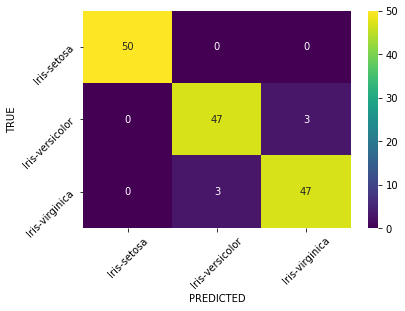

In [3]:
clf = MLPClassifier(solver='lbfgs')
df = pd.read_csv('data/iris.data', header=None)
X = df.values[:,:-1]
y = df.values[:,-1]
labels = list(sorted(set(y)))
y_pred = cross_val_predict(clf, X, y, cv=10)
show_report(y, y_pred, labels)

## Wine

https://archive.ics.uci.edu/ml/datasets/wine

The dataset contains chemical analysis results of wines grown in the same region of Italy as 13 attributes.

The wines are classified as being made with one of three grape cultivars.

             precision    recall  f1-score   support

          1       0.96      0.86      0.91        59
          2       0.73      0.63      0.68        71
          3       0.48      0.62      0.54        48

avg / total       0.74      0.71      0.72       178



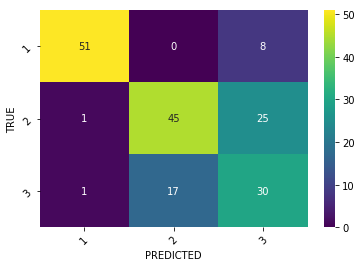

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(60,), solver='lbfgs', activation='logistic')
df = pd.read_csv('data/wine.data', header=None, dtype={ 0: str })
X = df.values[:,1:]
y = df.values[:,0]
labels = list(sorted(set(y)))
y_pred = cross_val_predict(clf, X, y, cv=10)
show_report(y, y_pred, labels)

I chose the following MLP parameters:

- Single 60 neuron hidden layer. I observed no significant improvements past this amount, or with multiple layers.
- [Limited-memory BFGS][bfgs] solver. As suggested in the documentation, this gives better results and converges faster for small datasets than the default [Adam][adam].
- [Logistic][log] activation. This gave significantly better results than either [ReLU][relu] (the default) or [hyperbolic tangent][tanh].

[bfgs]: https://en.wikipedia.org/wiki/Limited-memory_BFGS
[adam]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam
[log]: https://en.wikipedia.org/wiki/Logistic_function
[relu]: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
[tanh]: https://en.wikipedia.org/wiki/Hyperbolic_function

Cultivar 1 is the easiest to detect, being correctly classified with 86% recall accuracy, or 51 out of 59 times. The remaining 8 times it was misclassified as cultivar 3. The precision is 96%. This means that 51 out of 53 times that the classifier guessed the cultivar as 1, it was right. The [F1 score][f1] takes into account both accuracy and precision.

Cultivars 2 and 3 were clearly much more difficult for the network to distinguish. Particularly, the precision for cultivar 3 is only 48%, meaning that more than half of the time, a cultivar the network classified as 3 was either 1 or 2.

[f1]: https://en.wikipedia.org/wiki/F1_score

## Breast Cancer

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

The dataset contains various measurements of breast mass cell nuclei as 30 attributes.

The samples are classified as either benign or malignant.

             precision    recall  f1-score   support

     benign       0.93      0.95      0.94       357
  malignant       0.91      0.88      0.90       212

avg / total       0.92      0.92      0.92       569



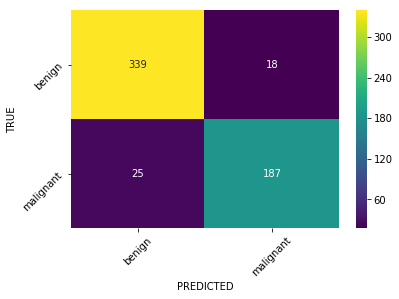

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(30,), activation='logistic', max_iter=1000)
df = pd.read_csv('data/wdbc.data', header=None)
X = df.values[:,2:]
y = df.values[:,1]
d = { 'B': 'benign', 'M': 'malignant' }
y = list(map(lambda l: d[l], y))
labels = list(sorted(set(y)))
y_pred = cross_val_predict(clf, X, y, cv=10)
show_report(y, y_pred, labels)

I chose the following MLP parameters:

- Single 30 neuron hidden layer. I observed no significant improvements past this amount, or with multiple layers.
- Logistic activation. Again, this gave significantly better results than ReLU, though in this case comparable to hyperbolic tangent.
- The default Adam solver gave the best results, though occasionally didn't converge in the default 200 iterations. This was increased accordingly.

...

## Mushroom

https://archive.ics.uci.edu/ml/datasets/Mushroom

The dataset contains the morphology of mushrooms as 22 attributes, but since these are categorical labels, this grows to 117 after binarizing.

The mushrooms are classified as either edible or poisonous.

             precision    recall  f1-score   support

     edible       0.95      0.99      0.97      4208
  poisonous       0.99      0.95      0.97      3916

avg / total       0.97      0.97      0.97      8124



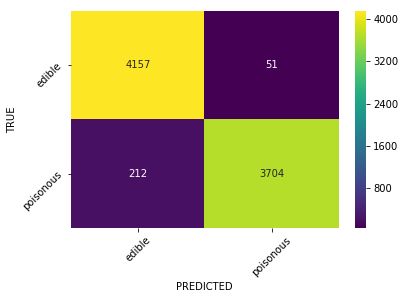

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(200,), activation='logistic')
df = pd.read_csv('data/agaricus-lepiota.data', header=None)
X = df.values[:,1:]
X = pd.get_dummies(pd.DataFrame(X)).values
y = df.values[:,0]
d = { 'e': 'edible', 'p': 'poisonous' }
y = list(map(lambda l: d[l], y))
labels = list(sorted(set(y)))
y_pred = cross_val_predict(clf, X, y, cv=10)
show_report(y, y_pred, labels)

...